# Exercici 1

### Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.
### * Important: Redueix la dimensió del dataset de manera aleatòria per tal d'obtenir un dataset de només 200.000 registres. Tots els exercicis s'han de fer amb aquest dataset reduït.

In [4]:
## importo les llibreries que necessito
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns',None) ## Poso aquesta opció per veure totes les columnes
vols = pd.read_csv('/Users/angelssastrenadal/Documents/DelayedFlights.csv') ##carrego el CSV a un dataframe
vols.head() ## Miro nomes les 5 primeres files i posa la capçalera de les columnes per explorar les dades que conté-

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [194]:
vols.info() ##Exploro de diferents formes les dades que conté: Aquestes son les variables i la tipologia.  


## Veiem que hi ha tipologia de numeros sencers, numeros decimals i objectes (aquests últims poden ser caràcters o nombres)
## També veiem aqui quantes files i columnes te. Hi gairebé 2M de registres i 30 variables/columnes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [3]:
## També miro a la documentació el format de les variables que he trobat a:
## https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7
## Variable descriptions: 

## Hi veig columnes interessants com (Any, mes i dia del mes i de la setmana) Temps de sortida i Temps de sortida 
## programada, Temps d'arribada i Temps d'arribada programada, Nom de la Aerolinea, temps actuals que triguen 
## en minuts i temps que haurien d'haver tingut programats, i minuts de retràs, també en treure'ls a la pista 
##(taxiin i out), si s'han cancellat, si s'han desviat i quin tipus de retard amb el format de cada columna.
## * Name Description 
## * 1 Year 1987-2008 
## * 2 Month 1-12 
## * 3 DayofMonth 1-31 
## * 4 DayOfWeek 1 (Monday) - 7 (Sunday) 
## * 5 DepTime actual departure time (local, hhmm) 
## * 6 CRSDepTime scheduled departure time (local, hhmm) 
## * 7 ArrTime actual arrival time (local, hhmm) 
## * 8 CRSArrTime scheduled arrival time (local, hhmm) 
## * 9 UniqueCarrier unique carrier code 
## * 10 FlightNum flight number 
## * 11 TailNum plane tail number 
## * 12 ActualElapsedTime in minutes 
## * 13 CRSElapsedTime in minutes 
## * 14 AirTime in minutes 
## * 15 ArrDelay arrival delay, in minutes 
## * 16 DepDelay departure delay, in minutes 
## * 17 Origin origin IATA airport code 
## * 18 Dest destination IATA airport code 
## * 19 Distance in miles 
## * 20 TaxiIn taxi in time, in minutes 
## * 21 TaxiOut taxi out time in minutes 
## * 22 Cancelled was the flight cancelled? 
## * 23 CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
## * 24 Diverted 1 = yes, 0 = no 
## * 25 CarrierDelay in minutes 
## * 26 WeatherDelay in minutes 
## * 27 NASDelay in minutes 
## * 28 SecurityDelay in minutes 
## * 29 LateAircraftDelay in minutes


In [4]:
## S'ha de vigilar abans de reduir el dataset perque aquest nou dataset reduit sigui estadisticament valid i 
## sigui apropiat per el que volem obtenir:

In [82]:
## Important, buscar tots els registres que no tenen dades per tant poden fer desviar els resultats estadístics 
## o altres anàlisis posteriors
vols.isnull().sum()  

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [83]:
## Mirar en aquest cas si hi han vols cancelats
volscancelled = [vols['Cancelled'] != 0]
volscancelled

[0          False
 1          False
 2          False
 3          False
 4          False
            ...  
 1936753    False
 1936754    False
 1936755    False
 1936756    False
 1936757    False
 Name: Cancelled, Length: 1936758, dtype: bool]

In [84]:
duplicates = vols.duplicated() #Miro si hi han files/registres duplicats
num_duplicates = duplicates.sum()
print("Hi han", num_duplicates, "duplicats.")

Hi han 0 duplicats.


In [85]:
#Per veure quines columnes escullim miro primer quina correlació hi ha entre elles. 0 indica que no hi ha correlació i 1 indica una correlació positiva perfecta.
vols.corr() 

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Unnamed: 0,1.000000,NaN,0.996163,0.055479,-0.000094,-0.009365,-0.012203,-0.000092,0.002347,-0.018826,0.025926,0.029418,0.021031,0.002571,0.006899,0.026011,0.033385,0.017770,0.028348,0.006663,0.003528,0.005581,0.017511,-0.003797,0.001457
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.996163,NaN,1.000000,0.059651,0.000088,-0.007809,-0.011367,0.001014,0.001367,-0.000188,0.002684,0.007046,0.000860,-0.000897,0.004769,0.005498,0.019705,0.002574,0.028837,0.006467,0.000420,0.006611,0.011441,-0.003066,0.004953
DayofMonth,0.055479,NaN,0.059651,1.000000,0.017476,0.001014,0.001019,0.000833,0.000758,-0.005912,-0.000880,-0.000028,-0.000244,0.004129,0.005289,0.000117,-0.002926,-0.002201,0.004671,0.001190,-0.000947,0.000916,0.005644,-0.000308,0.009100
DayOfWeek,-0.000094,NaN,0.000088,0.017476,1.000000,0.021924,0.027039,0.010913,0.017750,-0.009769,0.003072,0.004954,0.004738,0.006123,0.008538,0.008138,0.008516,-0.010302,0.000023,-0.001361,0.010215,0.005654,-0.006628,0.004665,0.008839
DepTime,-0.009365,NaN,-0.007809,0.001014,0.021924,1.000000,0.881598,0.458934,0.711513,-0.024786,-0.047040,-0.044619,-0.054831,0.127017,0.139254,-0.056003,-0.012023,0.030481,0.002280,-0.004632,-0.051948,0.005307,0.022530,-0.015273,0.169453
CRSDepTime,-0.012203,NaN,-0.011367,0.001019,0.027039,0.881598,1.000000,0.396724,0.710303,-0.054808,-0.034925,-0.026388,-0.036582,0.044447,0.058875,-0.029517,-0.032379,0.011408,0.000023,-0.009096,-0.107337,-0.009338,-0.032701,-0.017064,0.167734
ArrTime,-0.000092,NaN,0.001014,0.000833,0.010913,0.458934,0.396724,1.000000,0.619385,-0.013665,-0.013595,-0.012911,-0.017684,-0.050948,-0.053024,-0.027751,0.039818,0.001430,NaN,-0.007204,-0.083981,-0.029860,0.032395,-0.007417,-0.037949
CRSArrTime,0.002347,NaN,0.001367,0.000758,0.017750,0.711513,0.710303,0.619385,1.000000,-0.060006,0.033203,0.040117,0.025907,0.043078,0.053706,0.024335,0.013819,0.037942,0.000201,0.000907,-0.096156,-0.005033,0.009227,-0.013349,0.131467
FlightNum,-0.018826,NaN,-0.000188,-0.005912,-0.009769,-0.024786,-0.054808,-0.013665,-0.060006,1.000000,-0.322283,-0.335956,-0.341250,0.061266,0.051852,-0.356770,-0.003918,0.015524,0.009147,-0.002885,0.055712,0.067488,0.015405,-0.002809,-0.052708


Selecciono les columnes que ens poden interessar per el que demana l'exercici i que estàn correlacionades:
La data del vol, l'hora de sortida, l'hora d'arribada real i la programada per veure la diferencia, el ArrDelay que es els minuts de retard, 
El temps de vol en minuts i la distancia del vol en milles, els aeroports de sortida i d'arribada i per últim la aerolínia i el nro de vol 
per si podem predir algun patró en els retards (per aerolinia, en vols llargs,en un aeroport determinat, dates determinades etc)


In [5]:
vols_col = vols[['FlightNum','DepTime', 'ArrTime', 'CRSArrTime', 'ArrDelay','AirTime', 'TaxiIn', 'TaxiOut','Distance','UniqueCarrier','TailNum','Origin','Dest','Cancelled','CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']]
type(vols_col)
vols_col.head ()

,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,335,2003.0,2211.0,2225,-14.0,116.0,4.0,8.0,810,WN,N712SW,IAD,TPA,0,NaN,NaN,NaN,NaN,NaN
1,3231,754.0,1002.0,1000,2.0,113.0,5.0,10.0,810,WN,N772SW,IAD,TPA,0,NaN,NaN,NaN,NaN,NaN
2,448,628.0,804.0,750,14.0,76.0,3.0,17.0,515,WN,N428WN,IND,BWI,0,NaN,NaN,NaN,NaN,NaN
3,3920,1829.0,1959.0,1925,34.0,77.0,3.0,10.0,515,WN,N464WN,IND,BWI,0,2.0,0.0,0.0,0.0,32.0
4,378,1940.0,2121.0,2110,11.0,87.0,4.0,10.0,688,WN,N726SW,IND,JAX,0,NaN,NaN,NaN,NaN,NaN


Com hem d'escollir aleatoriament nomes 200000 files, el mes simple seria no tenir en compte els 689270 registres que no tenen causa de retard, evitant aquestes files a la base de dades general i tornar a mirar quines d'aquestes columnes encara mantenen valors null per tal de tenir una bdd neta abans d'escollir la mostra de 200000.
Com coincideixen el nro de nulls (689270). Trec els registres amb valor no null per 'CarrierDelay':

In [6]:
nova_mostra = vols_col[vols_col['CarrierDelay'].notnull()]
nova_mostra 

,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,3920,1829.0,1959.0,1925,34.0,77.0,3.0,10.0,515,WN,N464WN,IND,BWI,0,2.0,0.0,0.0,0.0,32.0
5,509,1937.0,2037.0,1940,57.0,230.0,3.0,7.0,1591,WN,N763SW,IND,LAS,0,10.0,0.0,0.0,0.0,47.0
7,1333,1644.0,1845.0,1725,80.0,107.0,6.0,8.0,828,WN,N334SW,IND,MCO,0,8.0,0.0,0.0,0.0,72.0
9,675,1452.0,1640.0,1625,15.0,213.0,7.0,8.0,1489,WN,N286WN,IND,PHX,0,3.0,0.0,0.0,0.0,12.0
11,4,1323.0,1526.0,1510,16.0,110.0,4.0,9.0,838,WN,N674AA,IND,TPA,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,1616,921.0,1112.0,1008,64.0,82.0,8.0,21.0,545,DL,N907DE,ATL,PBI,0,51.0,0.0,13.0,0.0,0.0
1936752,1620,1552.0,1735.0,1718,17.0,27.0,9.0,7.0,151,DL,N905DE,HSV,ATL,0,0.0,0.0,0.0,0.0,17.0
1936753,1621,1250.0,1617.0,1552,25.0,120.0,9.0,18.0,906,DL,N938DL,MSP,ATL,0,3.0,0.0,0.0,0.0,22.0
1936754,1631,657.0,904.0,749,75.0,78.0,15.0,34.0,481,DL,N3743H,RIC,ATL,0,0.0,57.0,18.0,0.0,0.0


Veig que el tipus de retard no està entrat en 689270 casos (gairebé un 30% dels registres) per tant serà dificil 
si agafem una mostra aleatoria de 200000 registres, i per casualitat escollim aquest registres, ens doni una 
indicació acurada de per quina raó son els retards. Podria intentar fer interpolació i omplir aquests Nans amb la mitjana
Com per exemple amb vols['ArrDelay'].fillna(vols['ArrDelay'].median(), inplace=True), però no crec que m'hauria donat millor resultats i eliminar-les es la manera mes simple de fer-ho. Despres comprovant que no hi han nulls i agafan la mostra de 200000.

Llegint la documentació també veig que un vol que arriba amb menys de 15 minuts de retard, se'l considera que no te retard.
Tantmateix veig que Arrival Delay que ens interessa molt per aquest exercici, es la suma de CarrierDelay, WeatherDelay, NASDelay i LateAircraftDelay, per tant si selecciono aquestes files 
es molt probable que tingui NaNs al temps de retard (ArrDelay) que si es important per fer aquest exercici. 

In [7]:
## Ara ja està neta, per tant trec una mostra aleatoria
volscolmostra=nova_mostra.sample(n=200000)
volscolmostra
## sobre la que farem totes les proves

,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
452107,442,2107.0,2316.0,2111,125.0,45.0,6.0,18.0,316,UA,N385UA,ORD,CLE,0,0.0,0.0,0.0,0.0,125.0
849230,663,1847.0,2130.0,2100,30.0,256.0,8.0,19.0,1709,AA,N638AA,MIA,DEN,0,7.0,0.0,23.0,0.0,0.0
925828,2812,1325.0,1506.0,1443,23.0,84.0,6.0,11.0,519,XE,N15973,AMA,IAH,0,0.0,0.0,6.0,0.0,17.0
1728929,796,2002.0,45.0,2306,99.0,140.0,9.0,14.0,1222,CO,N76515,LAS,IAH,0,0.0,0.0,4.0,0.0,95.0
426453,2695,1454.0,1621.0,1519,62.0,72.0,4.0,11.0,413,YV,N923FJ,MDT,CLT,0,0.0,0.0,0.0,0.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422713,2185,1219.0,1336.0,1319,17.0,55.0,9.0,13.0,316,XE,N15932,MFE,IAH,0,1.0,0.0,0.0,0.0,16.0
394840,3953,2003.0,2103.0,2025,38.0,49.0,3.0,8.0,321,WN,N753SW,MSY,BHM,0,0.0,0.0,0.0,0.0,38.0
471963,1437,1153.0,1324.0,1300,24.0,68.0,6.0,17.0,407,WN,N752SW,OAK,LAS,0,0.0,18.0,6.0,0.0,0.0
504577,3947,1733.0,1822.0,1635,107.0,30.0,3.0,16.0,116,MQ,N845AE,ORD,BMI,0,0.0,107.0,0.0,0.0,0.0


# Exercici 2

## * Troba quantes dades faltants hi ha per columna.

In [8]:
print(volscolmostra.info())
# Comprovo que no falten dades (nulls) i alhora que la nova base de dades que he escollit, es correcte.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 452107 to 1685122
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FlightNum          200000 non-null  int64  
 1   DepTime            200000 non-null  float64
 2   ArrTime            200000 non-null  float64
 3   CRSArrTime         200000 non-null  int64  
 4   ArrDelay           200000 non-null  float64
 5   AirTime            200000 non-null  float64
 6   TaxiIn             200000 non-null  float64
 7   TaxiOut            200000 non-null  float64
 8   Distance           200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  TailNum            200000 non-null  object 
 11  Origin             200000 non-null  object 
 12  Dest               200000 non-null  object 
 13  Cancelled          200000 non-null  int64  
 14  CarrierDelay       200000 non-null  float64
 15  WeatherDelay       200000 non-null  float64
 

## * Resumeix estadísticament el dataset i les columnes d’interès. Fes una anàlisi estadístic del que consideris rellevant.

In [9]:
#Puc fer un resum estadístic per defecte que es pot fer amb el comandament "describe" amb les columnes d'interès:
resumestadistic = volscolmostra[['ArrDelay', 'AirTime', 'Distance','CarrierDelay', 'WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay']].describe()
resumestadistic


,ArrDelay,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,62.980465,107.495520,741.965305,19.226790,3.692420,14.902070,0.088600,25.070585
std,60.388913,68.266414,560.059867,43.755825,21.411631,33.221742,1.959882,41.716022
min,15.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,58.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,89.500000,595.000000,2.000000,0.000000,2.000000,0.000000,8.000000
75%,78.000000,136.000000,972.000000,21.000000,0.000000,15.000000,0.000000,33.000000
max,2453.000000,649.000000,4962.000000,2436.000000,1027.000000,1137.000000,229.000000,994.000000



Puc extreure dades com que hi ha una mitja de 63 minuts de retard, la qual em sembla força gran, que un 75% dels vols arriben 
amb 78 minuts de retard, que em sembla molt gran també... Que el màxim retard va ser de 2453 minuts, (mes d'un dia!)
Per la desviació estandard veig que la majoria de vols s'apropen a la mitja en retards, o sigui que es una bdd amb molts retards.
Tambe veig que el vol mes llarg es de 4962 milles i 649 minuts de vol.
Em sembla extrany que hi hagi un vol de 24 milles i em fa pensar que pugui ser un error de data entry..
La majoria de vols es retrassen per CarrierDelay o NASDelay , es a dir que son retards que estan en el control de la aerolinea 
o del National Airspace System, també hi ha força vols que es retrassen per Weather Delay.                                                                                                   
                                                                                                      


Per poder fer calculs de patrons també voldria saber per exemple quina aerolinea te mes retards i com es comporten estadísticament i ho faig aqui a sota aprofitant la pregunta. Per veure la aerolinea que te mes retards puc fer la mitja per aerolinea, ja que hi ha aerolinees que tenen mes vols que altres i aprofito per fer la taula que demana a l'exercici:


## * Fes una taula de les aerolínies amb més endarreriments acumulats.

In [10]:
comptexaerolinea = volscolmostra.groupby('UniqueCarrier').count() #Agrupo per aerolinea i compto el nro de vols d'aquesta mostra
comptexaerolinea = comptexaerolinea.sort_values(by='Dest', ascending=False) #ordeno de mes a menys una columna
nrovols=comptexaerolinea.loc [:, ["Dest"]].reset_index() #Agafo una columna i faig un nou dataframe
nombrevols= nrovols.rename(columns={'Dest': 'NrodeVols'}) #Li poso nom a la columna en lloc de 'Dest'
nombrevols


,UniqueCarrier,NrodeVols
0,WN,32783
1,AA,21284
2,MQ,15831
3,UA,15269
4,OO,14296
5,DL,11667
6,XE,11440
7,US,9658
8,CO,9362
9,EV,9040


Veiem que Southwest i American Airlines son les que tenen mes vols 

In [11]:
#Ara miro els minuts de retard per aerolinea
retardxaerolinea = volscolmostra.groupby('UniqueCarrier')['ArrDelay'].sum() #Agrupo i sumo els minuts de retard per aerolinea
retardxaerolinea = retardxaerolinea.sort_values(ascending=False) #Ordeno resultats
tempsderetard = retardxaerolinea.reset_index()
tempsderetard


,UniqueCarrier,ArrDelay
0,WN,1725835.0
1,AA,1394990.0
2,UA,1059144.0
3,MQ,1001133.0
4,OO,913721.0
5,XE,783523.0
6,DL,707708.0
7,CO,630652.0
8,EV,609223.0
9,YV,571847.0


In [12]:
novabdd = pd.merge(left=tempsderetard, right=nombrevols, left_on='UniqueCarrier', right_on='UniqueCarrier') 
#Fusiono aquestes 2 taules enllaçant-les per el codi de l'aerolinea
novabdd.columns = ['UniqueCarrier', 'ArrDelay', 'NrOfFlights'] 
#Li canvio el nom a la columna 'NrodeVols' per aquest dataframe

novabdd['NrOfFlights'] = novabdd['NrOfFlights'].astype('float64') 
#Canvio el tipus a float64 per poder fer calculs
novabdd.head()


,UniqueCarrier,ArrDelay,NrOfFlights
0,WN,1725835.0,32783.0
1,AA,1394990.0,21284.0
2,UA,1059144.0,15269.0
3,MQ,1001133.0,15831.0
4,OO,913721.0,14296.0


Aqui veiem que les aerolinees que acumulen mes retards son **Southhwest Airlines , American Airlines, United Airlines, Envoy Air y Skywest**

In [13]:
# Per saber quin es la mitja de retard per cada aerolinea

mitjaxaerolinea = volscolmostra.groupby('UniqueCarrier')['ArrDelay'].mean()

mitjaxaerolinea = mitjaxaerolinea.reset_index() 
mitjaxaerolinea
estadisticaxaerolinea = pd.merge(left=novabdd, right=mitjaxaerolinea, left_on='UniqueCarrier', right_on='UniqueCarrier') 
#Fusiono aquestes 2 taules enllaçant-les per el codi de l'aerolinea
estadisticaxaerolinea.columns = ['UniqueCarrier', 'ArrDelay', 'NrOfFlights','AvgDelaybyCarrier'] #Poso nom a la columna
estadisticaxaerolinea = estadisticaxaerolinea.sort_values(by='AvgDelaybyCarrier',ascending=False)
#Ordeno resultats per mitja per Aerolinea

estadisticaxaerolinea

,UniqueCarrier,ArrDelay,NrOfFlights,AvgDelaybyCarrier
12,B6,477524.0,6099.0,78.295458
9,YV,571847.0,8013.0,71.364907
2,UA,1059144.0,15269.0,69.365643
5,XE,783523.0,11440.0,68.489773
8,EV,609223.0,9040.0,67.391925
7,CO,630652.0,9362.0,67.362957
14,OH,416270.0,6268.0,66.411934
1,AA,1394990.0,21284.0,65.541721
15,9E,365524.0,5677.0,64.386824
4,OO,913721.0,14296.0,63.914452


Ens sortiria que la que te la mitja mes alta de retards es Jet Blue (B6) amb 78 minuts de mitja i la que menys Aloha Airlines AQ amb 41.7 minuts i per tant podria decidir no volar amb Jet Blue i decidir-me per Aloha Airlines si volessin a les mateixa destinacio.

<AxesSubplot:xlabel='UniqueCarrier'>

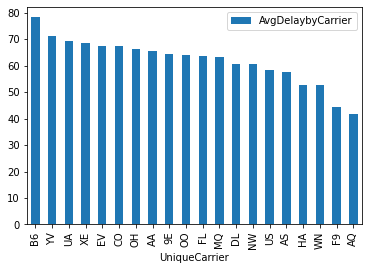

In [14]:
estadisticaxaerolinea.plot.bar(x='UniqueCarrier',y='AvgDelaybyCarrier') #També ho podriem veure gràficament

In [16]:
## De la mateixa manera seria interessant veure si hi ha mes retards en avions determinats perque son vells:
Avions = volscolmostra[['TailNum','Distance','Origin','Dest','ArrDelay']] #Mirem el TailNum que identifica l'avió en concret
Avions = Avions.sort_values(by='TailNum',ascending=False)
Avions
## Aqui sota veiem que el mateix avio pot fer diferents rutes


,TailNum,Distance,Origin,Dest,ArrDelay
1260875,N999DN,594,ATL,DTW,147.0
1260291,N999DN,306,GSO,ATL,154.0
571544,N999DN,761,ATL,LGA,32.0
1932806,N999DN,1035,PBI,LGA,31.0
723159,N999DN,606,ATL,ORD,78.0
...,...,...,...,...,...
1708297,80009E,120,GRR,DTW,36.0
524656,80009E,587,IND,PHL,41.0
139602,80009E,424,DTW,ABE,26.0
1603143,80009E,432,OKC,MEM,94.0


In [17]:
Avionsretards = Avions.groupby('TailNum')['ArrDelay'].mean() #Calculo la mitja de retard per avió fisic
Avionsretards= Avionsretards.reset_index()

Avionsretards= Avionsretards.sort_values(by='ArrDelay',ascending=False)

Avionsretards

,TailNum,ArrDelay
4350,N820NW,449.0
873,N240MQ,401.0
4260,N806NW,355.0
607,N171UA,309.0
4201,N7BHAA,298.0
...,...,...
4358,N821NW,16.0
4339,N818NW,15.0
4198,N7BDAA,15.0
249,N1200K,15.0


In [213]:
## Veiem que en aquesta mostra no hi ha avions que destaquin per tenir uns retards que destaquin molt per fora de la mostra.

## * Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...).

In [18]:
## Per saber la velocitat mitjana haurem de buscar fer Distancia/Temps que en el database assumiré que es Distance/Airtime...

volscolmostra['AvgSpeed'] = volscolmostra['Distance'] / volscolmostra['AirTime'] #Creo columna 'AvgSpeed'
volscolmostra #La velocitat mitja mostrada es en milles per minut

,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgSpeed
452107,442,2107.0,2316.0,2111,125.0,45.0,6.0,18.0,316,UA,N385UA,ORD,CLE,0,0.0,0.0,0.0,0.0,125.0,7.022222
849230,663,1847.0,2130.0,2100,30.0,256.0,8.0,19.0,1709,AA,N638AA,MIA,DEN,0,7.0,0.0,23.0,0.0,0.0,6.675781
925828,2812,1325.0,1506.0,1443,23.0,84.0,6.0,11.0,519,XE,N15973,AMA,IAH,0,0.0,0.0,6.0,0.0,17.0,6.178571
1728929,796,2002.0,45.0,2306,99.0,140.0,9.0,14.0,1222,CO,N76515,LAS,IAH,0,0.0,0.0,4.0,0.0,95.0,8.728571
426453,2695,1454.0,1621.0,1519,62.0,72.0,4.0,11.0,413,YV,N923FJ,MDT,CLT,0,0.0,0.0,0.0,0.0,62.0,5.736111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422713,2185,1219.0,1336.0,1319,17.0,55.0,9.0,13.0,316,XE,N15932,MFE,IAH,0,1.0,0.0,0.0,0.0,16.0,5.745455
394840,3953,2003.0,2103.0,2025,38.0,49.0,3.0,8.0,321,WN,N753SW,MSY,BHM,0,0.0,0.0,0.0,0.0,38.0,6.551020
471963,1437,1153.0,1324.0,1300,24.0,68.0,6.0,17.0,407,WN,N752SW,OAK,LAS,0,0.0,18.0,6.0,0.0,0.0,5.985294
504577,3947,1733.0,1822.0,1635,107.0,30.0,3.0,16.0,116,MQ,N845AE,ORD,BMI,0,0.0,107.0,0.0,0.0,0.0,3.866667


In [20]:

def late (ArrDelay): #Defineixo una funció si el retard es mes gran a 0
    if ArrDelay > 0:
        return "Yes"
    else: 
        return "No"
volscolmostra['IsLate?'] = volscolmostra['ArrDelay'].apply(late) #Li poso una columna que es diu "Islate?"

volscolmostra


,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgSpeed,IsLate?
452107,442,2107.0,2316.0,2111,125.0,45.0,6.0,18.0,316,UA,N385UA,ORD,CLE,0,0.0,0.0,0.0,0.0,125.0,7.022222,Yes
849230,663,1847.0,2130.0,2100,30.0,256.0,8.0,19.0,1709,AA,N638AA,MIA,DEN,0,7.0,0.0,23.0,0.0,0.0,6.675781,Yes
925828,2812,1325.0,1506.0,1443,23.0,84.0,6.0,11.0,519,XE,N15973,AMA,IAH,0,0.0,0.0,6.0,0.0,17.0,6.178571,Yes
1728929,796,2002.0,45.0,2306,99.0,140.0,9.0,14.0,1222,CO,N76515,LAS,IAH,0,0.0,0.0,4.0,0.0,95.0,8.728571,Yes
426453,2695,1454.0,1621.0,1519,62.0,72.0,4.0,11.0,413,YV,N923FJ,MDT,CLT,0,0.0,0.0,0.0,0.0,62.0,5.736111,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422713,2185,1219.0,1336.0,1319,17.0,55.0,9.0,13.0,316,XE,N15932,MFE,IAH,0,1.0,0.0,0.0,0.0,16.0,5.745455,Yes
394840,3953,2003.0,2103.0,2025,38.0,49.0,3.0,8.0,321,WN,N753SW,MSY,BHM,0,0.0,0.0,0.0,0.0,38.0,6.551020,Yes
471963,1437,1153.0,1324.0,1300,24.0,68.0,6.0,17.0,407,WN,N752SW,OAK,LAS,0,0.0,18.0,6.0,0.0,0.0,5.985294,Yes
504577,3947,1733.0,1822.0,1635,107.0,30.0,3.0,16.0,116,MQ,N845AE,ORD,BMI,0,0.0,107.0,0.0,0.0,0.0,3.866667,Yes


## * Quins són els vols més llargs? I els més endarrerits? Busca les rutes més llargues i les que acumulen més retards.

In [21]:
## Per veure el vol mes llarg
Vols = volscolmostra[['Distance','FlightNum','UniqueCarrier','Origin','Dest','ArrDelay']]#Creu nova taula i Agafo aquestes columnes
Vols = Vols.reset_index() #Faig taula nova
Vols = Vols.sort_values(by='Distance',ascending=False) #Ordeno per nro de Vol
Vols.head(50)

,index,Distance,FlightNum,UniqueCarrier,Origin,Dest,ArrDelay
27347,1622562,4962,15,CO,EWR,HNL,126.0
142589,1417613,4962,15,CO,EWR,HNL,104.0
108126,556355,4962,14,CO,HNL,EWR,109.0
42913,368957,4962,14,CO,HNL,EWR,23.0
189634,1255024,4962,15,CO,EWR,HNL,17.0
178759,1929201,4962,15,CO,EWR,HNL,16.0
92252,719887,4962,15,CO,EWR,HNL,43.0
191470,1619526,4962,15,CO,EWR,HNL,19.0
36607,1926817,4962,15,CO,EWR,HNL,162.0
58895,363637,4962,15,CO,EWR,HNL,28.0


Els vols mes llargs son: 
- **El nro de vol 15 i 14 de Continental Airline de Nova York a Honolulu i viceversa amb 4962 Milles**
- **El nro de vols 1273,1560,1561,850 i 851 de Delta Airlines de Atlanta a Honolulu i viceversa amb 4502 Milles**

In [22]:
## Per veure els vols mes endarrerit

Vols = Vols.sort_values(by='ArrDelay',ascending=False) #Ordeno per Retard acumulat
Vols.head(5)

,index,Distance,FlightNum,UniqueCarrier,Origin,Dest,ArrDelay
56569,686014,930,1699,NW,CLT,MSP,2453.0
190638,163379,1811,2398,AA,EGE,MIA,1525.0
48956,1214839,1399,804,NW,SEA,MSP,1510.0
57393,318717,1426,218,NW,PDX,MSP,1350.0
50316,349850,979,2233,AA,RSW,STL,1312.0


# Els vols mes endarrerits en aquesta mostra son: 
- **El nro de vol 1699 de Northwest Airlines de Charlotte (CLT) a Minneapolis (MSP) amb 2453 minuts de retard**
- **El nro de vols 2398 de American Airlines de Colorado (EGE) a Miami(DFW) amb 1595 minuts de retard**

In [23]:
## Per veure la ruta convertiré dos columnes en una Origin-Dest per poder agrupar i ordenar mes fàcilment
volscolmostra['Ruta'] = volscolmostra['Origin'].str.cat(volscolmostra['Dest'], sep='-') #Creo una nova columna Ruta

volscolmostra = volscolmostra.sort_values(by='Distance',ascending=False) #Ordeno per Distancia

volscolmostra.head(50)

,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,Origin,Dest,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgSpeed,IsLate?,Ruta
1622562,15,1540.0,2016.0,1810,126.0,609.0,10.0,17.0,4962,CO,N59053,EWR,HNL,0,125.0,0.0,1.0,0.0,0.0,8.147783,Yes,EWR-HNL
1417613,15,1431.0,1954.0,1810,104.0,587.0,10.0,86.0,4962,CO,N59053,EWR,HNL,0,0.0,0.0,48.0,0.0,56.0,8.453152,Yes,EWR-HNL
556355,14,2256.0,1459.0,1310,109.0,578.0,11.0,74.0,4962,CO,N69063,HNL,EWR,0,11.0,0.0,98.0,0.0,0.0,8.584775,Yes,HNL-EWR
368957,14,2251.0,1333.0,1310,23.0,546.0,11.0,25.0,4962,CO,N76064,HNL,EWR,0,0.0,0.0,23.0,0.0,0.0,9.087912,Yes,HNL-EWR
1255024,15,1356.0,1827.0,1810,17.0,600.0,5.0,26.0,4962,CO,N66056,EWR,HNL,0,17.0,0.0,0.0,0.0,0.0,8.270000,Yes,EWR-HNL
1929201,15,1418.0,1951.0,1935,16.0,606.0,9.0,18.0,4962,CO,N76055,EWR,HNL,0,0.0,0.0,0.0,0.0,16.0,8.188119,Yes,EWR-HNL
719887,15,1402.0,1853.0,1810,43.0,623.0,4.0,24.0,4962,CO,N67052,EWR,HNL,0,0.0,0.0,16.0,0.0,27.0,7.964687,Yes,EWR-HNL
1619526,15,1409.0,1829.0,1810,19.0,600.0,5.0,15.0,4962,CO,N66051,EWR,HNL,0,19.0,0.0,0.0,0.0,0.0,8.270000,Yes,EWR-HNL
1926817,15,1407.0,2217.0,1935,162.0,634.0,9.0,147.0,4962,CO,N67058,EWR,HNL,0,0.0,32.0,130.0,0.0,0.0,7.826498,Yes,EWR-HNL
363637,15,1342.0,1948.0,1920,28.0,644.0,8.0,14.0,4962,CO,N66051,EWR,HNL,0,3.0,0.0,6.0,0.0,19.0,7.704969,Yes,EWR-HNL


Les Rutes mes llargues son:
- **Nova York(Aeroport Newark) a Honolulu i viceversa amb 4962 Milles**
- **Atlanta a HonoLulu i viceversa amb 4502 Milles**



In [25]:
## Agrupo per Ruta ja que la Distancia serà sempre igual a la mateixa ruta
Distanciesagrupades = volscolmostra.groupby('Ruta')['ArrDelay'].sum() #Sumo els minuts de retard per ruta

Distanciesagrupades = Distanciesagrupades.reset_index() #Faig una taula
Distanciesagrupades = Distanciesagrupades.sort_values(by='ArrDelay',ascending=False) #Ordeno per Retard per veure
Distanciesagrupades


,Ruta,ArrDelay
3465,ORD-LGA,35006.0
2583,LGA-ORD,34349.0
2512,LAX-SFO,33198.0
3436,ORD-EWR,31173.0
204,ATL-LGA,30168.0
...,...,...
319,AUS-MSP,15.0
1689,FCA-ATL,15.0
4772,VPS-CVG,15.0
4707,TUL-LAX,15.0


##### Les Rutes amb mes retard son:
- **Chicago (ORD) a Nova York La Guardia (LGA) amb un retard acumulat de 35006 minuts i la ruta de tornada amb 34349 minuts**
- **Los Angeles (LAX) a San Francisco (SFO) amb un retard de 33198 minuts**



# Exercici 3

## Exporta el dataset net i amb les noves columnes a Excel.

In [ ]:
Elimino les columnes que ja son irrelevants com Origin Dest i Cancelled perque he creat de noves

In [36]:



# Faig una copia abans d'esborrar
copiavolscolmostra = volscolmostra.copy()
copiavolscolmostra = copiavolscolmostra.reset_index()
#Elimino les 3 columnes 
del copiavolscolmostra['Origin'] 
del copiavolscolmostra['Dest']
del copiavolscolmostra['Cancelled']
copiavolscolmostra

,index,FlightNum,DepTime,ArrTime,CRSArrTime,ArrDelay,AirTime,TaxiIn,TaxiOut,Distance,UniqueCarrier,TailNum,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AvgSpeed,IsLate?,Ruta
0,1622562,15,1540.0,2016.0,1810,126.0,609.0,10.0,17.0,4962,CO,N59053,125.0,0.0,1.0,0.0,0.0,8.147783,Yes,EWR-HNL
1,1417613,15,1431.0,1954.0,1810,104.0,587.0,10.0,86.0,4962,CO,N59053,0.0,0.0,48.0,0.0,56.0,8.453152,Yes,EWR-HNL
2,556355,14,2256.0,1459.0,1310,109.0,578.0,11.0,74.0,4962,CO,N69063,11.0,0.0,98.0,0.0,0.0,8.584775,Yes,HNL-EWR
3,368957,14,2251.0,1333.0,1310,23.0,546.0,11.0,25.0,4962,CO,N76064,0.0,0.0,23.0,0.0,0.0,9.087912,Yes,HNL-EWR
4,1255024,15,1356.0,1827.0,1810,17.0,600.0,5.0,26.0,4962,CO,N66056,17.0,0.0,0.0,0.0,0.0,8.270000,Yes,EWR-HNL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1240809,65,1046.0,1126.0,1100,26.0,33.0,3.0,4.0,31,AS,N794AS,0.0,10.0,16.0,0.0,0.0,0.939394,Yes,WRG-PSG
199996,549984,64,1554.0,1627.0,1605,22.0,16.0,5.0,12.0,31,AS,N762AS,0.0,0.0,5.0,0.0,17.0,1.937500,Yes,PSG-WRG
199997,1911725,64,1610.0,1638.0,1555,43.0,18.0,5.0,5.0,31,AS,N763AS,42.0,0.0,1.0,0.0,0.0,1.722222,Yes,PSG-WRG
199998,1310363,5052,1448.0,1602.0,1540,22.0,23.0,9.0,42.0,30,OH,N442CA,0.0,0.0,22.0,0.0,0.0,1.304348,Yes,HPN-JFK


In [37]:
#Exporto a Excel la bdd
copiavolscolmostra.to_excel('C:/Users/angelssastrenadal/Downloads/ITAcademy_Exercicis/Volsbddamericana.xlsx', index=False)